In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image

In [2]:
# Define image dimensions
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

In [3]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu')) # its is for avoid negtive number or non-linearity 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64)) # it is used for all neuron connect to all output from previous layer
model.add(Activation('relu'))
model.add(Dropout(0.5)) # prevent the overfitting
model.add(Dense(1)) #for binary classification 0 or 1
model.add(Activation('sigmoid')) #it ia used for givr the final neuron b/w 1 or 0 

model.summary()

C:\Users\rraj8\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 223, 223, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 223, 223, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 110, 110, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 54, 54, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 27, 27, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 46656)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,986,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,998,913 (11.44 MB)

 Trainable params: 2,998,913 (11.44 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [5]:
# Data generators
train_data_dir = r'D:\project\v_data\train'
test_data_dir = r'D:\project\v_data\test'


datagen = ImageDataGenerator(rescale=1. / 255)

train_data_gen = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=20,
    class_mode='binary'
)

test_data_gen = datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=20,
    class_mode='binary'
)


Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
# Train the model
epochs = 20
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=test_data_gen
)

C:\Users\rraj8\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.5204 - loss: 1.0786 - val_accuracy: 0.7700 - val_loss: 0.5038
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.7494 - loss: 0.5137 - val_accuracy: 0.8000 - val_loss: 0.4018
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.7664 - loss: 0.4860 - val_accuracy: 0.8200 - val_loss: 0.3597
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.8638 - loss: 0.3916 - val_accuracy: 0.8500 - val_loss: 0.3060
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.8459 - loss: 0.3836 - val_accuracy: 0.8700 - val_loss: 0.3183
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 0.8904 - loss: 0.2920 - val_accuracy: 0.7900 - val_loss: 0.4160
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - accuracy: 0.8854 - loss: 0.2654 - val_accuracy: 0.8300 - val_loss: 0.3247
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.9221 - loss: 0.1893 - val_accuracy: 0.

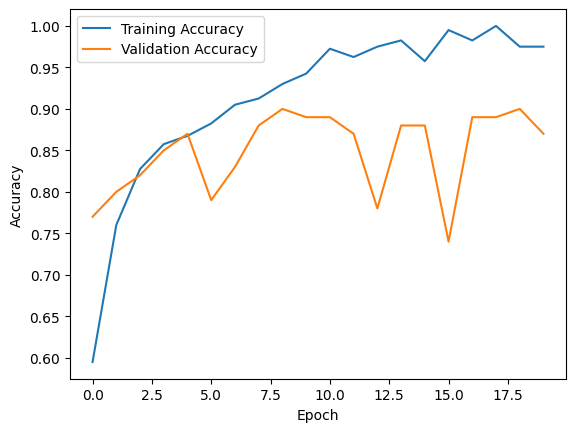

In [7]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

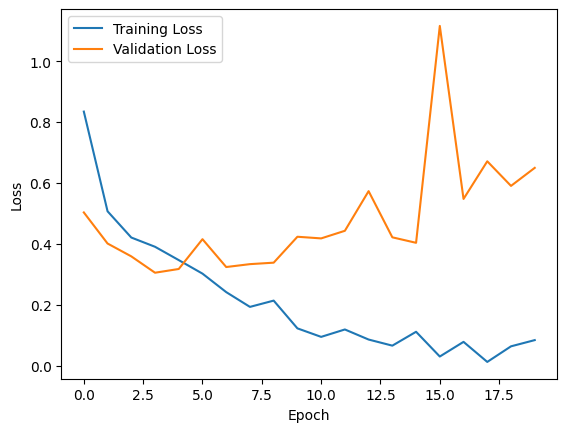

In [8]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
# Create the main application window
root = tk.Tk()
root.title("Image Classifier")
root.geometry("1000x800")


''

In [10]:
 import os

# Absolute paths for the icon and background images
icon_path = 'D:/project/v_data/v_data/icon.png'
background_path = 'C:\Users\rraj8\OneDrive\Pictures\Screenshots\Screenshot 2024-07-04 104140.png'

# Print the paths to verify
print("Icon Path:", icon_path)
print("Background Path:", background_path)



SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (375658493.py, line 5)

In [11]:
# Ensure the files exist
if not os.path.exists(icon_path):
    print(f"Error: Icon file not found at {icon_path}")
else:
    root.iconphoto(True, tk.PhotoImage(file=icon_path))

if not os.path.exists(background_path):
    print(f"Error: Background file not found at {background_path}")
else:
    background_image = Image.open(background_path)
    background_image = background_image.resize((1000, 800))
    background_photo = ImageTk.PhotoImage(background_image)

    background_label = tk.Label(root, image=background_photo)
    background_label.place(x=0, y=0, relwidth=1, relheight=1)


NameError: name 'os' is not defined

In [ ]:
# Add a title label
title_label = tk.Label(root, text="IMAGE CLASSIFIER", font=("Arial", 15, "bold"), bg='#101018', fg='white')
title_label.pack(pady=20)


In [12]:
# Function to open a file dialog and get the image path
def browse_image():
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg;*.png;*.jpeg")])
    if file_path:
        classify_and_update(file_path)


In [13]:
# Create a label to display the image and prediction
image_label = tk.Label(root, bg='#1c1f2e', padx=10, pady=10)
image_label.pack(pady=10)


In [14]:
# Function to update the image and prediction label
def update_image_label(image_path, prediction_text):
    img = Image.open(image_path)
    img.thumbnail((400, 400))
    img = ImageTk.PhotoImage(img)
    image_label.config(image=img)
    image_label.image = img

    prediction_label.config(text=prediction_text)


In [15]:
# Create a label to display the prediction text
prediction_label = tk.Label(root, text="", font=("Arial", 16), bg='#1c1f2e', fg='skyblue')
prediction_label.pack(pady=10)

empty = tk.Label(root, text="Click on the button below", font='Arial 10', bg="#1c1f2e", fg="yellow")
empty.pack(pady=0)

In [16]:
# Load and predict function
def load_and_predict(image_path):
    # Load the image, preprocess, and pass through the trained model
    img = Image.open(image_path)
    img = img.resize((img_width, img_height))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)[0][0]  # Binary output (0 or 1)
    return prediction

In [17]:
# Function to classify and update the image label and prediction
def classify_and_update(image_path):
    prediction = load_and_predict(image_path)

    if prediction >= 0.5:
        prediction_text = "It's a plane!"
    else:
        prediction_text = "It's a car!"

    update_image_label(image_path, prediction_text + f" (Probability: {round(prediction, 4)})")


In [18]:
# Function to allow the user to input their own image
def browse_and_classify():
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg;*.png;*.jpeg")])
    if file_path:
        classify_and_update(file_path)

In [19]:
# Button to browse and classify the user's own image
classify_button = tk.Button(root, text="Browse and Classify Image", font=("Arial", 14), command=browse_and_classify,
                            bg="#ffc107", fg="black")
classify_button.pack(pady=20)

# Main loop to run the GUI application
root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
